# **LIBRARY**

In [ ]:
!pip install sklearn
!pip install scipy

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin, clone
import sklearn_pandas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import csv
import warnings
warnings.filterwarnings('ignore')
import sys

# **IMPORT DATASET**

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#align the training and testing data
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)

In [ ]:
df_train.shape

(1460, 80)

In [ ]:
df_test.shape

(1459, 80)

# **ADE**

digunakan saleprice sebagai variabel dependen dalam studi kasus kali ini

In [ ]:
df_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


<Axes: ylabel='SalePrice'>

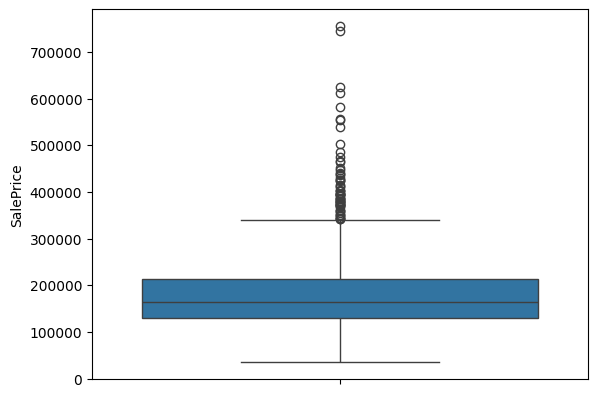

In [ ]:
sns.boxplot(df_train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

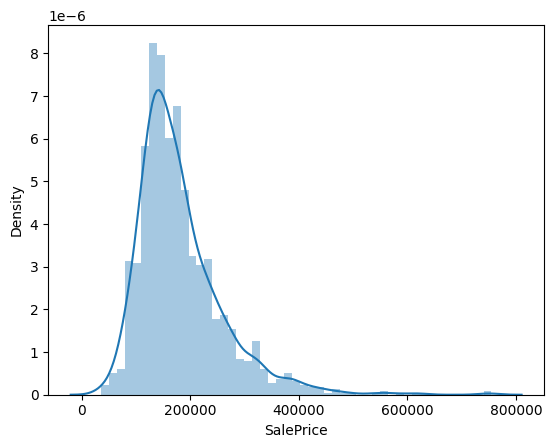

In [ ]:
sns.distplot(df_train['SalePrice'])

In [ ]:
df_train['SalePrice'].skew()

1.8828757597682129

In [ ]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

Text(0.5, 1.0, 'Density plot of SalePrice setelah Log Transformation')

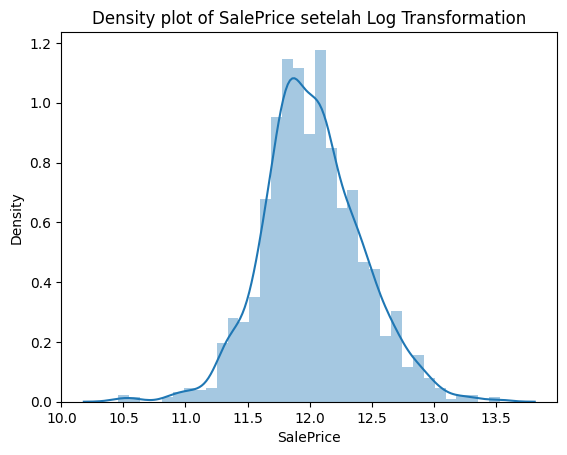

In [ ]:
sns.distplot(df_train['SalePrice'])
plt.title("Density plot of SalePrice setelah Log Transformation")

Text(0.5, 1.0, 'Boxplot of SalePrice setelah Log Transformation')

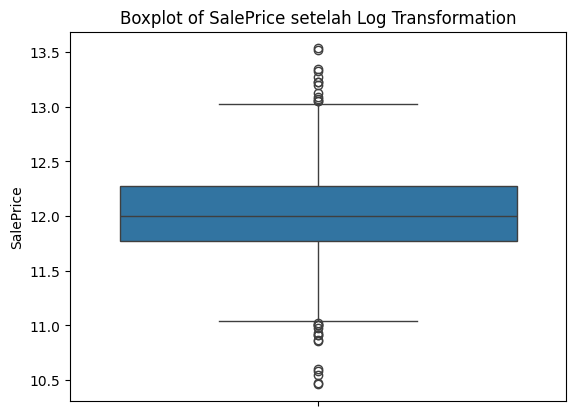

In [ ]:
sns.boxplot(df_train['SalePrice'])
plt.title("Boxplot of SalePrice setelah Log Transformation")

In [ ]:
y_train = df_train['SalePrice']

DROP FITUR DENGAN NULL TERBANYAK

In [ ]:
df_train = df_train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','Id'], axis=1)

In [ ]:
df_test = df_test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','Id'], axis=1)

In [ ]:
df_train = df_train.drop(columns=['Street','LandContour','Utilities','LandSlope','Condition2','Condition1',
                             'RoofMatl','Heating','Functional','SaleType','EnclosedPorch',
                             'SaleCondition','Electrical', 'RoofStyle','PavedDrive', 'BsmtCond',
                             'GarageCond','CentralAir','KitchenAbvGr','BsmtFinType2'], axis=1)

In [ ]:
df_test = df_test.drop(columns=['Street','LandContour','Utilities','LandSlope','Condition2','Condition1',
                             'RoofMatl','Heating','Functional','SaleType','EnclosedPorch',
                             'SaleCondition','Electrical', 'RoofStyle','PavedDrive', 'BsmtCond',
                             'GarageCond','CentralAir','KitchenAbvGr','BsmtFinType2'], axis=1)

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

,0
LotFrontage,259
GarageFinish,81
GarageYrBlt,81
GarageQual,81
GarageType,81
BsmtExposure,38
BsmtFinType1,37
BsmtQual,37
MasVnrArea,8
BsmtHalfBath,0


In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

,0
LotFrontage,227
GarageFinish,78
GarageYrBlt,78
GarageQual,78
GarageType,76
BsmtExposure,44
BsmtQual,44
BsmtFinType1,42
MasVnrArea,15
MSZoning,4


In [ ]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

In [ ]:
df_train['GarageQual'] = df_train['GarageQual'].fillna("TA")
df_test['GarageQual'] = df_test['GarageQual'].fillna("TA")

In [ ]:
df_train['BsmtQual'] = df_train['BsmtQual'].fillna("TA")
df_test['BsmtQual'] = df_test['BsmtQual'].fillna("TA")

In [ ]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna("No")
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna("No")

In [ ]:
df_train['BsmtFinType1']= df_train['BsmtFinType1'].fillna("Unf")
df_test['BsmtFinType1']= df_test['BsmtFinType1'].fillna("Unf")

In [ ]:
df_train['GarageType']=df_train['GarageType'].fillna("Attchd")
df_test['GarageType']=df_test['GarageType'].fillna("Attchd")

In [ ]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna("Unf")
df_test['GarageFinish']=df_test['GarageFinish'].fillna("Unf")

In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

,0
LotFrontage,227
GarageYrBlt,78
MSZoning,4
BsmtHalfBath,2
BsmtFullBath,2
GarageArea,1
Exterior2nd,1
Exterior1st,1
GarageCars,1
BsmtFinSF1,1


In [ ]:
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)

In [ ]:
df_test['MSZoning']=df_test['MSZoning'].fillna("RL")
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
df_test['Exterior1st'] = df_test['Exterior1st'].fillna("VinylSd")
df_test['GarageCars']= df_test['GarageCars'].fillna(2)
df_test['KitchenQual']=df_test['KitchenQual'].fillna("TA")
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(0)
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna("VinylSd")
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(0)

In [ ]:
num_missing = df_train['LotFrontage'].isnull().sum()
random_values = np.random.randint(60,80, size=num_missing)
df_train.loc[df_train['LotFrontage'].isnull(),'LotFrontage'] = random_values

In [ ]:
num_missing_test = df_test['LotFrontage'].isnull().sum()
random_values_test = np.random.randint(60,80, size=num_missing_test)
df_test.loc[df_test['LotFrontage'].isnull(),'LotFrontage'] = random_values_test

# **CEK KORELASI**

In [ ]:
# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Take the correlation of SalePrice with other variables
correlation_with_saleprice = correlation_matrix["SalePrice"].sort_values(ascending=False)

# Display correlations
print(correlation_with_saleprice)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.331779
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64


In [ ]:
df_train=df_train.drop(columns=['GarageArea','GarageYrBlt', 'BsmtHalfBath',
                                'MSSubClass','YrSold','BsmtFinSF2'])

In [ ]:
df_test=df_test.drop(columns=['GarageArea','GarageYrBlt', 'BsmtHalfBath',
                                'MSSubClass','YrSold','BsmtFinSF2'])

Text(0.5, 1.0, 'GrLivArea vs SalePrice')

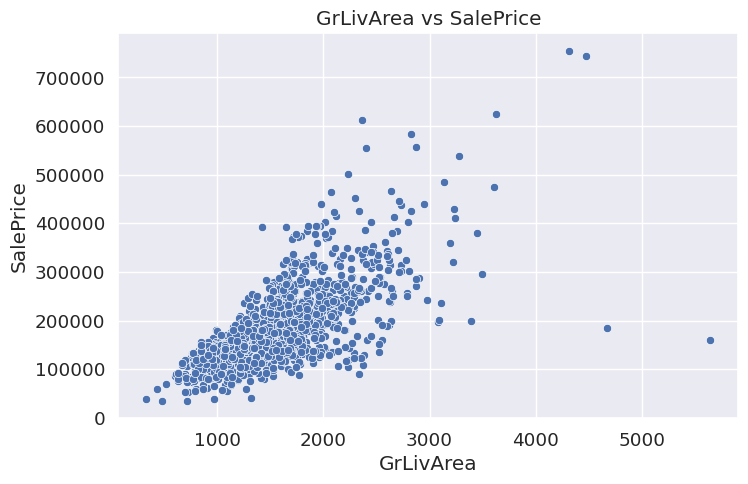

In [ ]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1.2)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)
plt.title("GrLivArea vs SalePrice")

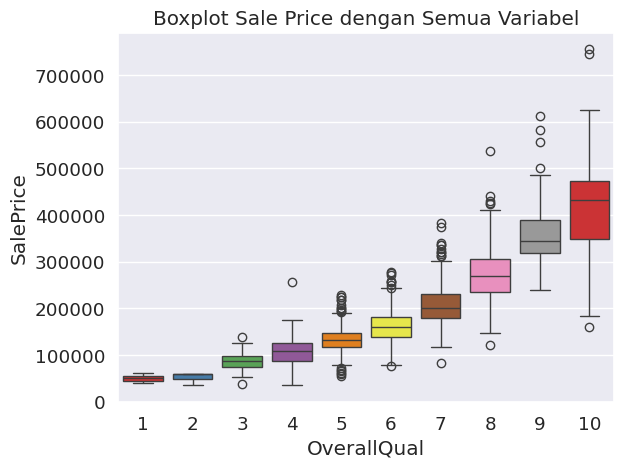

In [ ]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train, palette='Set1')
plt.title("Boxplot Sale Price dengan Semua Variabel")
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

BoxPlot SalePrice berdasarkan YearBuilt

In [ ]:
df_train['YearBuilt'].describe()

,YearBuilt
count,1460.000000
mean,1971.267808
std,30.202904
min,1872.000000
25%,1954.000000
50%,1973.000000
75%,2000.000000
max,2010.000000


In [ ]:
bins=[1871, 1953, 1972,1999,2010]
labels = ['Min54', '54-72','73-99','00-10']
df_train['YearBuilt_Cat']=pd.cut(df_train['YearBuilt'], bins=bins, labels=labels, right=False)

In [ ]:
import pandas as pd

# Define the bins and the corresponding numerical labels
bins = [1871, 1953, 1972, 1999, 2010]
labels = [1, 2, 3, 4]  # Change the labels to numerical categories

# Create the categorical column
df_train['YearBuilt_Cat'] = pd.cut(df_train['YearBuilt'], bins=bins, labels=labels, right=False)

# Optional: Convert the categorical column to integer type if necessary
df_train['YearBuilt_Cat'] = df_train['YearBuilt_Cat'].astype(int)


In [ ]:
df_train['YearBuilt_Cat'].isnull().sum()

1

In [ ]:
null_index = df_train[df_train['YearBuilt_Cat'].isnull()].index
print(null_index)

Index([], dtype='int64')


In [ ]:
df_train = df_train.drop(index=378)

In [ ]:
df_train.drop('YearBuilt', axis=1)

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageQual,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Cat
0,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,...,TA,0,61,0,0,0,0,2,208500,00-10
1,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,...,TA,298,0,0,0,0,0,5,181500,73-99
2,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,...,TA,0,42,0,0,0,0,9,223500,00-10
3,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,...,TA,0,35,0,0,0,0,2,140000,Min54
4,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,...,TA,192,84,0,0,0,0,12,250000,00-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Reg,Inside,Gilbert,1Fam,2Story,6,5,...,TA,0,40,0,0,0,0,8,175000,00-10
1456,RL,85.0,13175,Reg,Inside,NWAmes,1Fam,1Story,6,6,...,TA,349,0,0,0,0,0,2,210000,73-99
1457,RL,66.0,9042,Reg,Inside,Crawfor,1Fam,2Story,7,9,...,TA,0,60,0,0,0,2500,5,266500,Min54
1458,RL,68.0,9717,Reg,Inside,NAmes,1Fam,1Story,5,6,...,TA,366,0,0,0,0,0,4,142125,Min54


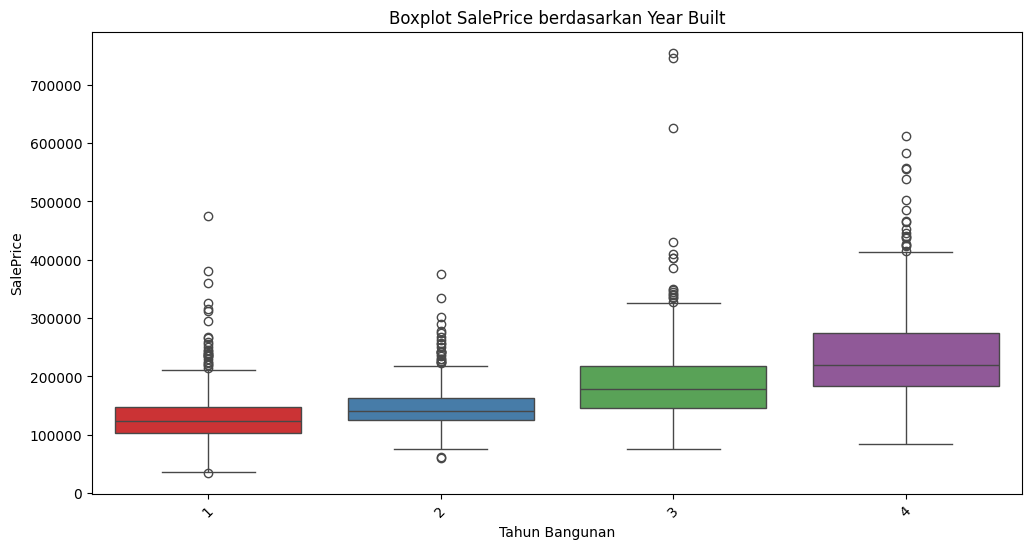

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='YearBuilt_Cat', y='SalePrice', data=df_train, palette='Set1')
plt.title("Boxplot SalePrice berdasarkan Year Built")
plt.xlabel('Tahun Bangunan')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

YearRemode Train

In [ ]:
df_train['YearRemodAdd'].describe()

,YearRemodAdd
count,1459.000000
mean,1984.848526
std,20.641986
min,1950.000000
25%,1967.000000
50%,1994.000000
75%,2004.000000
max,2010.000000


In [ ]:
df_train['YearRemodAdd'].isnull().sum()

0

In [ ]:
bins=[1949, 1966, 1993,2003,2010]
labels = ['Min67', '67-93','94-03','04-10']
df_train['YearRemod_Cat']=pd.cut(df_train['YearRemodAdd'], bins=bins, labels=labels, right=False)

In [ ]:
df_train['YearRemod_Cat'].isnull().sum()

5

In [ ]:
null_index = df_train[df_train['YearRemod_Cat'].isnull()].index
print(null_index)

Index([157, 819, 855, 898, 987], dtype='int64')


In [ ]:
df_train = df_train.drop(index=null_index)

In [ ]:
df_train.drop('YearRemodAdd', axis=1)

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageQual,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Cat
0,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,...,TA,0,61,0,0,0,0,2,208500,00-10
1,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,...,TA,298,0,0,0,0,0,5,181500,73-99
2,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,...,TA,0,42,0,0,0,0,9,223500,00-10
3,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,...,TA,0,35,0,0,0,0,2,140000,Min54
4,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,...,TA,192,84,0,0,0,0,12,250000,00-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Reg,Inside,Gilbert,1Fam,2Story,6,5,...,TA,0,40,0,0,0,0,8,175000,00-10
1456,RL,85.0,13175,Reg,Inside,NWAmes,1Fam,1Story,6,6,...,TA,349,0,0,0,0,0,2,210000,73-99
1457,RL,66.0,9042,Reg,Inside,Crawfor,1Fam,2Story,7,9,...,TA,0,60,0,0,0,2500,5,266500,Min54
1458,RL,68.0,9717,Reg,Inside,NAmes,1Fam,1Story,5,6,...,TA,366,0,0,0,0,0,4,142125,Min54


YearBuilt Test

In [ ]:
bins=[1871, 1953, 1972,1999,2010]
labels = ['Min54', '54-72','73-99','00-10']
df_test['YearBuilt_Cat']=pd.cut(df_test['YearBuilt'], bins=bins, labels=labels, right=False)

In [ ]:
df_test['YearBuilt']

,YearBuilt
0,1961
1,1958
2,1997
3,1998
4,1992
...,...
1454,1970
1455,1970
1456,1960
1457,1992


In [ ]:
null_index = df_test[df_test['YearBuilt_Cat'].isnull()].index
print(null_index)

Index([], dtype='int64')


In [ ]:
df_test['YearBuilt'] = np.nan_to_num(df_test['YearBuilt_Cat'], nan = 4)

In [ ]:
df_test['YearBuilt_Cat'].isnull().sum()

2

In [ ]:
# Fill NaN values at specific indices (e.g., 42 and 116) with a default value (e.g., 0)
df_test.loc[42, 'YearBuilt'] = 2005
df_test.loc[116, 'YearBuilt'] = 2005

# After filling the values, convert the column to integer
df_test['YearBuilt'] = df_test['YearBuilt'].astype(int)

# Verify the changes
print(df_test.loc[[42, 116], 'YearBuilt'])


42     2005
116    2005
Name: YearBuilt, dtype: int64


In [ ]:
import pandas as pd

# Define the bins and the corresponding numerical labels
bins = [1871, 1953, 1972, 1999, 2010]
labels = [1, 2, 3, 4]  # Change the labels to numerical categories

# Create the categorical column
df_test['YearBuilt_Cat'] = pd.cut(df_test['YearBuilt'], bins=bins, labels=labels, right=False)

# Optional: Convert the categorical column to integer type if necessary
df_test['YearBuilt_Cat'] = df_test['YearBuilt_Cat'].astype(int)


In [ ]:
df_test.drop('YearBuilt', axis=1)

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Cat
0,RH,80.0,11622,Reg,Inside,NAmes,1Fam,1Story,5,6,...,1.0,TA,140,0,0,120,0,0,6,54-72
1,RL,81.0,14267,IR1,Corner,NAmes,1Fam,1Story,6,6,...,1.0,TA,393,36,0,0,0,12500,6,54-72
2,RL,74.0,13830,IR1,Inside,Gilbert,1Fam,2Story,5,5,...,2.0,TA,212,34,0,0,0,0,3,73-99
3,RL,78.0,9978,IR1,Inside,Gilbert,1Fam,2Story,6,6,...,2.0,TA,360,36,0,0,0,0,6,73-99
4,RL,43.0,5005,IR1,Inside,StoneBr,TwnhsE,1Story,8,5,...,2.0,TA,0,82,0,144,0,0,1,73-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Reg,Inside,MeadowV,Twnhs,2Story,4,7,...,0.0,TA,0,0,0,0,0,0,6,54-72
1455,RM,21.0,1894,Reg,Inside,MeadowV,TwnhsE,2Story,4,5,...,1.0,TA,0,24,0,0,0,0,4,54-72
1456,RL,160.0,20000,Reg,Inside,Mitchel,1Fam,1Story,5,7,...,2.0,TA,474,0,0,0,0,0,9,54-72
1457,RL,62.0,10441,Reg,Inside,Mitchel,1Fam,SFoyer,5,5,...,0.0,TA,80,32,0,0,0,700,7,73-99


YearRemodAdd Test

In [ ]:
df_test['YearRemodAdd'].describe()

,YearRemodAdd
count,1459.000000
mean,1983.662783
std,21.130467
min,1950.000000
25%,1963.000000
50%,1992.000000
75%,2004.000000
max,2010.000000


In [ ]:
df_test['YearRemodAdd'].isnull().sum()

0

In [ ]:
bins=[1949, 1966, 1993,2003,2010]
labels = ['Min67', '67-93','94-03','04-10']
df_test['YearRemod_Cat']=pd.cut(df_test['YearRemodAdd'], bins=bins, labels=labels, right=False)

In [ ]:
df_test['YearRemod_Cat'].isnull().sum()

0

In [ ]:
null_index = df_test[df_test['YearRemod_Cat'].isnull()].index
print(null_index)

Index([15, 16, 28, 42, 112, 116, 148], dtype='int64')


In [ ]:
# Fill NaN values at specific indices (e.g., 42 and 116) with a default value (e.g., 0)
#null_index = [15, 16, 28, 42, 112, 116, 148]
df_test.loc[15, 'YearRemodAdd'] = 1950
df_test.loc[16, 'YearRemodAdd'] = 1950
df_test.loc[28, 'YearRemodAdd'] = 1950
df_test.loc[42, 'YearRemodAdd'] = 1950
df_test.loc[112, 'YearRemodAdd'] = 1950
df_test.loc[116, 'YearRemodAdd'] = 1950
df_test.loc[148, 'YearRemodAdd'] = 1950


# After filling the values, convert the column to integer
df_test['YearRemodAdd'] = df_test['YearRemodAdd'].astype(int)



In [ ]:
df_test.drop('YearRemodAdd', axis=1)

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Cat
0,RH,80.0,11622,Reg,Inside,NAmes,1Fam,1Story,5,6,...,1.0,TA,140,0,0,120,0,0,6,54-72
1,RL,81.0,14267,IR1,Corner,NAmes,1Fam,1Story,6,6,...,1.0,TA,393,36,0,0,0,12500,6,54-72
2,RL,74.0,13830,IR1,Inside,Gilbert,1Fam,2Story,5,5,...,2.0,TA,212,34,0,0,0,0,3,73-99
3,RL,78.0,9978,IR1,Inside,Gilbert,1Fam,2Story,6,6,...,2.0,TA,360,36,0,0,0,0,6,73-99
4,RL,43.0,5005,IR1,Inside,StoneBr,TwnhsE,1Story,8,5,...,2.0,TA,0,82,0,144,0,0,1,73-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Reg,Inside,MeadowV,Twnhs,2Story,4,7,...,0.0,TA,0,0,0,0,0,0,6,54-72
1455,RM,21.0,1894,Reg,Inside,MeadowV,TwnhsE,2Story,4,5,...,1.0,TA,0,24,0,0,0,0,4,54-72
1456,RL,160.0,20000,Reg,Inside,Mitchel,1Fam,1Story,5,7,...,2.0,TA,474,0,0,0,0,0,9,54-72
1457,RL,62.0,10441,Reg,Inside,Mitchel,1Fam,SFoyer,5,5,...,0.0,TA,80,32,0,0,0,700,7,73-99


# **PENANGANAN OUTLIER**

# Sale Price

Text(0.5, 1.0, 'Boxplot of SalePrice setelah Log Transformation')

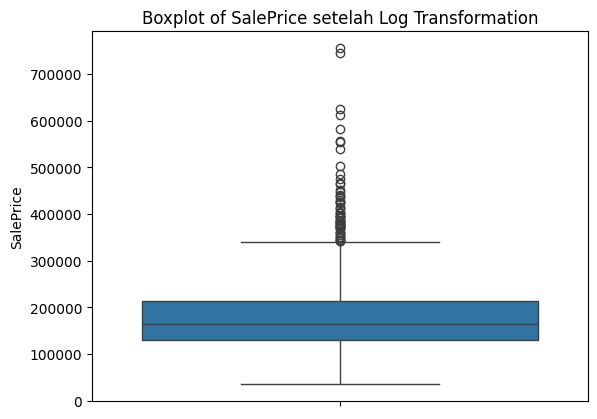

In [ ]:
sns.boxplot(df_train['SalePrice'])
plt.title("Boxplot of SalePrice setelah Log Transformation")

In [ ]:
saleprice_cond = df_train['SalePrice'] < 500000
df_train = df_train[saleprice_cond]

# GrLivArea

Text(0.5, 1.0, 'Boxplot GrLivArea')

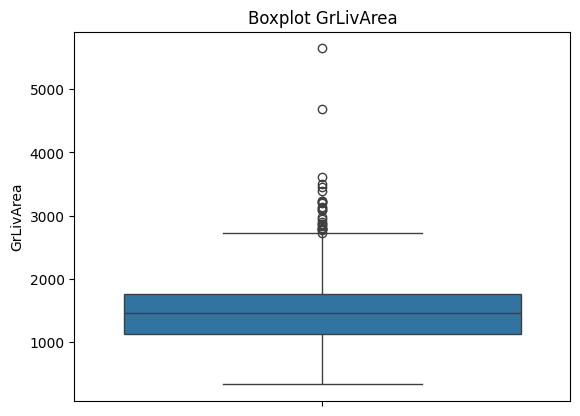

In [ ]:
sns.boxplot(df_train['GrLivArea'])
plt.title("Boxplot GrLivArea")

In [ ]:
grliv_cond = df_train['GrLivArea'] < 4000
df_train = df_train[grliv_cond]

# LotFrontage

Text(0.5, 1.0, 'Boxplot LotFrontage')

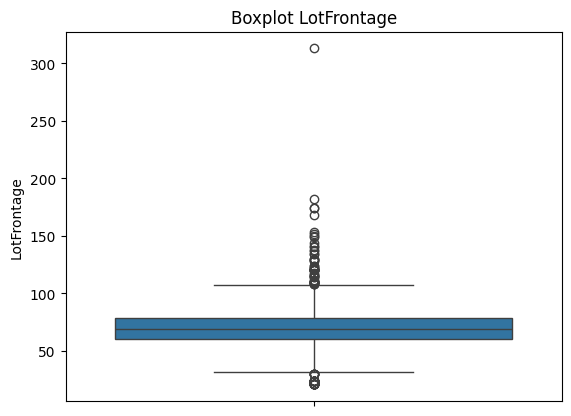

In [ ]:
sns.boxplot(df_train['LotFrontage'])
plt.title("Boxplot LotFrontage")

In [ ]:
lotfr_cond = df_train['LotFrontage'] < 200
lotfr_cond2 = df_train['LotFrontage'] > 25
df_train = df_train[lotfr_cond]
df_train =df_train[lotfr_cond2]

# LotArea

Text(0.5, 1.0, 'Boxplot LotArea')

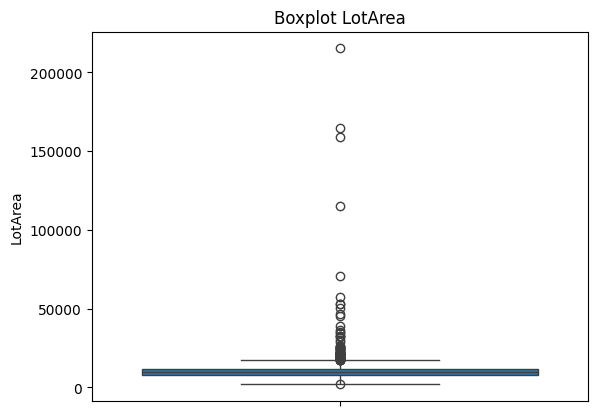

In [ ]:
sns.boxplot(df_train['LotArea'])
plt.title("Boxplot LotArea")

In [ ]:
lot_ar = df_train['LotArea'] < 50000
df_train = df_train[lot_ar]

# MasVnrArea

Text(0.5, 1.0, 'Boxplot MasVnrArea')

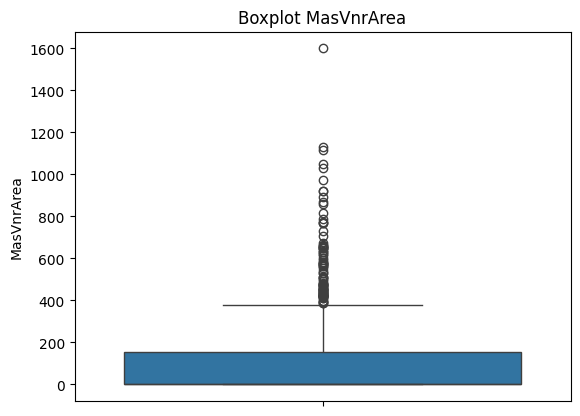

In [ ]:
sns.boxplot(df_train['MasVnrArea'])
plt.title("Boxplot MasVnrArea")

In [ ]:
masvnr_cond = df_train['MasVnrArea'] < 800
df_train = df_train[masvnr_cond]

# BsmtFinSF1

Text(0.5, 1.0, 'Boxplot BsmtFinSF1')

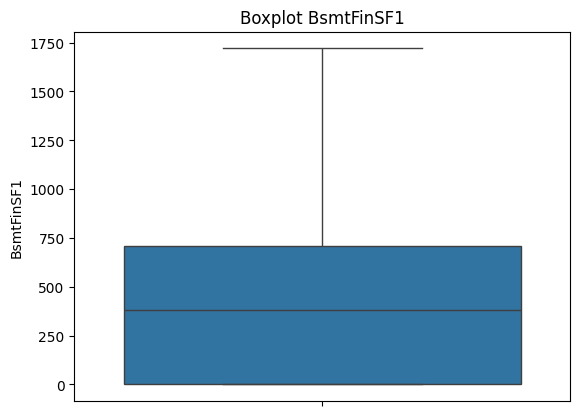

In [ ]:
sns.boxplot(df_train['BsmtFinSF1'])
plt.title("Boxplot BsmtFinSF1")

In [ ]:
bsmt_cond = df_train['BsmtFinSF1'] < 3000
df_train = df_train[bsmt_cond]

# TotalBsmtSF

Text(0.5, 1.0, 'Boxplot TotalBsmtSF')

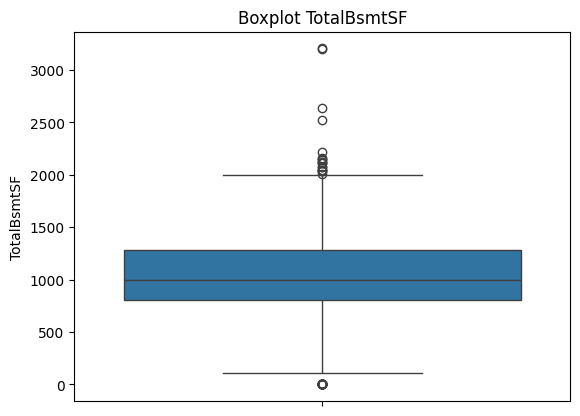

In [ ]:
sns.boxplot(df_train['TotalBsmtSF'])
plt.title("Boxplot TotalBsmtSF")

In [ ]:
totalbsmt_cond = df_train['TotalBsmtSF'] < 3000
df_train = df_train[totalbsmt_cond]

# 1stFlrSF

Text(0.5, 1.0, 'Boxplot 1stFlrSF')

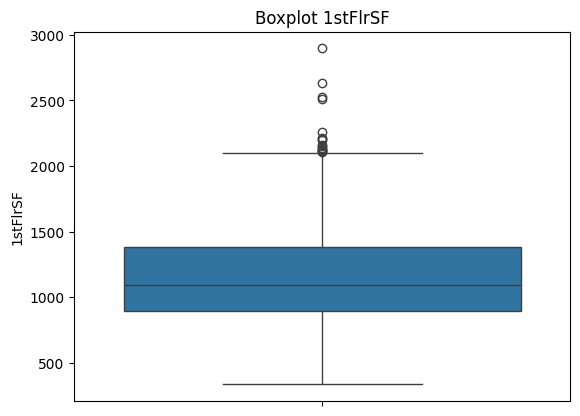

In [ ]:
sns.boxplot(df_train['1stFlrSF'])
plt.title("Boxplot 1stFlrSF")

In [ ]:
sf_cond = df_train['1stFlrSF'] < 3000
df_train = df_train[sf_cond]

# WoodDeckSF

Text(0.5, 1.0, 'Boxplot WoodDeckSF')

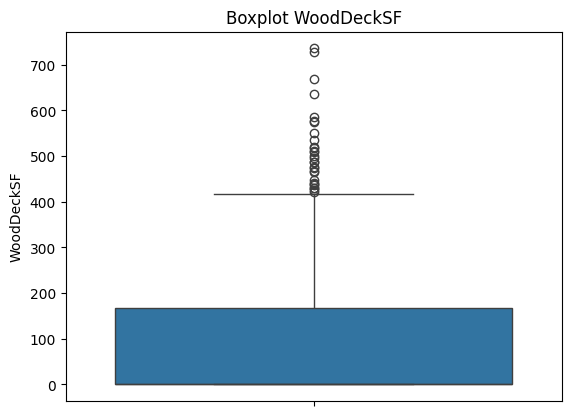

In [ ]:
sns.boxplot(df_train['WoodDeckSF'])
plt.title("Boxplot WoodDeckSF")

In [ ]:
wood_cond = df_train['WoodDeckSF'] < 600
df_train = df_train[wood_cond]

# OpenPorchSF

Text(0.5, 1.0, 'Boxplot OpenPorchSF')

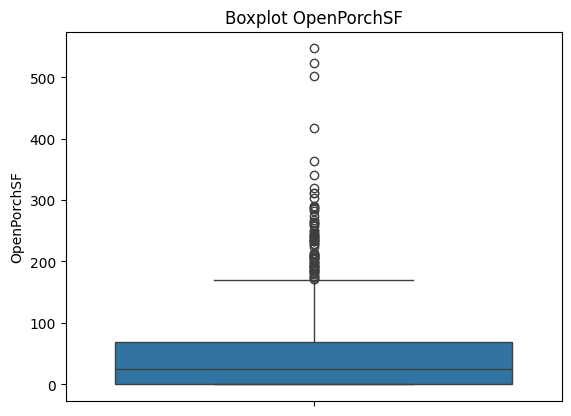

In [ ]:
sns.boxplot(df_train['OpenPorchSF'])
plt.title("Boxplot OpenPorchSF")

In [ ]:
porch_cond = df_train['OpenPorchSF'] < 300
df_train = df_train[porch_cond]

In [ ]:
df_train

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageQual,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Cat
0,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,...,TA,0,61,0,0,0,0,2,208500,00-10
1,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,...,TA,298,0,0,0,0,0,5,181500,73-99
2,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,...,TA,0,42,0,0,0,0,9,223500,00-10
3,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,...,TA,0,35,0,0,0,0,2,140000,Min54
4,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,...,TA,192,84,0,0,0,0,12,250000,00-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,FV,62.0,7500,Reg,Inside,Somerst,1Fam,1Story,7,5,...,TA,0,113,0,0,0,0,10,185000,00-10
1455,RL,62.0,7917,Reg,Inside,Gilbert,1Fam,2Story,6,5,...,TA,0,40,0,0,0,0,8,175000,00-10
1456,RL,85.0,13175,Reg,Inside,NWAmes,1Fam,1Story,6,6,...,TA,349,0,0,0,0,0,2,210000,73-99
1457,RL,66.0,9042,Reg,Inside,Crawfor,1Fam,2Story,7,9,...,TA,0,60,0,0,0,2500,5,266500,Min54


In [ ]:
df_test

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Cat
0,RH,80.0,11622,Reg,Inside,NAmes,1Fam,1Story,5,6,...,1.0,TA,140,0,0,120,0,0,6,54-72
1,RL,81.0,14267,IR1,Corner,NAmes,1Fam,1Story,6,6,...,1.0,TA,393,36,0,0,0,12500,6,54-72
2,RL,74.0,13830,IR1,Inside,Gilbert,1Fam,2Story,5,5,...,2.0,TA,212,34,0,0,0,0,3,73-99
3,RL,78.0,9978,IR1,Inside,Gilbert,1Fam,2Story,6,6,...,2.0,TA,360,36,0,0,0,0,6,73-99
4,RL,43.0,5005,IR1,Inside,StoneBr,TwnhsE,1Story,8,5,...,2.0,TA,0,82,0,144,0,0,1,73-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Reg,Inside,MeadowV,Twnhs,2Story,4,7,...,0.0,TA,0,0,0,0,0,0,6,54-72
1455,RM,21.0,1894,Reg,Inside,MeadowV,TwnhsE,2Story,4,5,...,1.0,TA,0,24,0,0,0,0,4,54-72
1456,RL,160.0,20000,Reg,Inside,Mitchel,1Fam,1Story,5,7,...,2.0,TA,474,0,0,0,0,0,9,54-72
1457,RL,62.0,10441,Reg,Inside,Mitchel,1Fam,SFoyer,5,5,...,0.0,TA,80,32,0,0,0,700,7,73-99


# **Variabel Kategorik**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1368 entries, 0 to 1458
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1368 non-null   object  
 1   LotFrontage    1368 non-null   float64 
 2   LotArea        1368 non-null   int64   
 3   LotShape       1368 non-null   object  
 4   LotConfig      1368 non-null   object  
 5   Neighborhood   1368 non-null   object  
 6   BldgType       1368 non-null   object  
 7   HouseStyle     1368 non-null   object  
 8   OverallQual    1368 non-null   int64   
 9   OverallCond    1368 non-null   int64   
 10  YearBuilt      1368 non-null   int64   
 11  YearRemodAdd   1368 non-null   int64   
 12  Exterior1st    1368 non-null   object  
 13  Exterior2nd    1368 non-null   object  
 14  MasVnrArea     1368 non-null   float64 
 15  ExterQual      1368 non-null   object  
 16  ExterCond      1368 non-null   object  
 17  Foundation     1368 non-null   object 

In [ ]:
df_train_list_columns = df_train.columns.to_list()
print(df_train_list_columns)

['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_Cat']


In [ ]:
y = df_train['SalePrice']

features = df_train.columns.to_list()
cat_features = df_train.select_dtypes(include=['object','category'])
list_cat_features = cat_features.columns.to_list()
X = df_train[features]
X= X.drop(columns=['SalePrice'])
print(features)

['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_Cat']


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSZoning       1459 non-null   object  
 1   LotFrontage    1459 non-null   float64 
 2   LotArea        1459 non-null   int64   
 3   LotShape       1459 non-null   object  
 4   LotConfig      1459 non-null   object  
 5   Neighborhood   1459 non-null   object  
 6   BldgType       1459 non-null   object  
 7   HouseStyle     1459 non-null   object  
 8   OverallQual    1459 non-null   int64   
 9   OverallCond    1459 non-null   int64   
 10  YearBuilt      1459 non-null   int64   
 11  YearRemodAdd   1459 non-null   int64   
 12  Exterior1st    1459 non-null   object  
 13  Exterior2nd    1459 non-null   object  
 14  MasVnrArea     1459 non-null   float64 
 15  ExterQual      1459 non-null   object  
 16  ExterCond      1459 non-null   object  
 17  Foundation     1459 non-null   ob

In [ ]:
features_df_test = df_test.columns.to_list()
cat_features_test = df_test.select_dtypes(include=['object','category'])
list_cat_features_test = cat_features_test.columns.to_list()
X_df_test = df_test[features_df_test]

# **ADJUSTMENT AND TRANSFORMATION**

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from feature_engine import encoding

In [ ]:
onehot = encoding.OneHotEncoder(variables = list_cat_features)
onehot.fit(X)
X = onehot.transform(X)

In [ ]:
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,GarageFinish_Fin,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Ex,GarageQual_Po,YearBuilt_Cat_00-10,YearBuilt_Cat_73-99,YearBuilt_Cat_Min54,YearBuilt_Cat_54-72
0,65.0,8450,7,5,2003,2003,196.0,706,150,856,...,0,1,0,0,0,0,1,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,978,284,1262,...,0,1,0,0,0,0,0,1,0,0
2,68.0,11250,7,5,2001,2002,162.0,486,434,920,...,0,1,0,0,0,0,1,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,216,540,756,...,0,1,0,0,0,0,0,0,1,0
4,84.0,14260,8,5,2000,2000,350.0,655,490,1145,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,62.0,7500,7,5,2004,2005,0.0,410,811,1221,...,0,1,0,0,0,0,1,0,0,0
1455,62.0,7917,6,5,1999,2000,0.0,0,953,953,...,0,1,0,0,0,0,1,0,0,0
1456,85.0,13175,6,6,1978,1988,119.0,790,589,1542,...,0,1,0,0,0,0,0,1,0,0
1457,66.0,9042,7,9,1941,2006,0.0,275,877,1152,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
X=X.drop('YearBuilt', axis=1)

In [ ]:
X=X.drop('YearRemodAdd', axis=1)

In [ ]:
onehot_test = encoding.OneHotEncoder(variables = list_cat_features_test)
onehot_test.fit(X_df_test)
X_df_test = onehot_test.transform(X_df_test)

In [ ]:
X_df_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,GarageFinish_Fin,GarageFinish_RFn,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,YearBuilt_Cat_54-72,YearBuilt_Cat_73-99,YearBuilt_Cat_00-10,YearBuilt_Cat_Min54
0,80.0,11622,5,6,1961,1961,0.0,468.0,270.0,882.0,...,0,0,1,0,0,0,1,0,0,0
1,81.0,14267,6,6,1958,1958,108.0,923.0,406.0,1329.0,...,0,0,1,0,0,0,1,0,0,0
2,74.0,13830,5,5,1997,1998,0.0,791.0,137.0,928.0,...,1,0,1,0,0,0,0,1,0,0
3,78.0,9978,6,6,1998,1998,20.0,602.0,324.0,926.0,...,1,0,1,0,0,0,0,1,0,0
4,43.0,5005,8,5,1992,1992,0.0,263.0,1017.0,1280.0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,...,0,0,1,0,0,0,1,0,0,0
1455,21.0,1894,4,5,1970,1970,0.0,252.0,294.0,546.0,...,0,0,1,0,0,0,1,0,0,0
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,1224.0,...,0,0,1,0,0,0,1,0,0,0
1457,62.0,10441,5,5,1992,1992,0.0,337.0,575.0,912.0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
X_df_test = X_df_test.drop('YearBuilt', axis=1)

In [ ]:
X_df_test = X_df_test.drop('YearRemodAdd', axis=1)

In [ ]:
import pandas as pd

# Assuming X_df_test and X are your DataFrames

# Get the column lists
test_columns = X_df_test.columns.to_list()
train_columns = X.columns.to_list()

# Find columns in X_df_test that are not in X
missing_in_train = set(test_columns) - set(train_columns)

# Find columns in X that are not in X_df_test
missing_in_test = set(train_columns) - set(test_columns)

# Display the missing columns
print("Columns in X_df_test but not in X:", missing_in_train)
print("Columns in X but not in X_df_test:", missing_in_test)

Columns in X_df_test but not in X: {'Neighborhood_BrDale', 'Neighborhood_Blueste'}
Columns in X but not in X_df_test: {'Exterior2nd_Other', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'GarageQual_Ex', 'HouseStyle_2.5Fin'}


In [ ]:
# Print the current columns in X_df_test
print("Current columns in X_df_test:", X_df_test.columns.to_list())

# Attempt to drop the columns (with corrected spelling)
columns_to_drop = ['Neighborhood_BrDale', 'Neighborhood_Blueste']  # Correcting the spelling

# Check if the columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in X_df_test.columns]

# Drop the existing columns
if existing_columns_to_drop:
    X_df_test = X_df_test.drop(existing_columns_to_drop, axis=1)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No columns to drop found in X_df_test.")

Current columns in X_df_test: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_FV', 'MSZoning_C (all)', 'LotShape_Reg', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_Inside', 'LotConfig_Corner', 'LotConfig_FR2', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_NAmes', 'Neighborhood_Gilbert', 'Neighborhood_StoneBr', 'Neighborhood_BrDale', 'Neighborhood_NPkVill', 'Neighborhood_NridgHt', 'Neighborhood_Blmngtn', 'Neighborhood_NoRidge', 'Neighborhood_Somerst', 'Neighborhood_SawyerW', 'Neighborhood_Sawyer', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_SWISU'

In [ ]:
# Print the current columns in X_df_test
print("Current columns in X_df_train:", X.columns.to_list())

# Attempt to drop the columns (with corrected spelling)
columns_to_drop = ['GarageQual_Ex','Exterior1st_ImStucc','Exterior1st_Stone','HouseStyle_2.5Fin','Exterior2nd_Other']  # Correcting the spelling

# Check if the columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in X.columns]

# Drop the existing columns
if existing_columns_to_drop:
    X = X.drop(existing_columns_to_drop, axis=1)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No columns to drop found in X_df_test.")

Current columns in X_df_train: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'MSZoning_RL', 'MSZoning_RM', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'LotShape_Reg', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotConfig_Inside', 'LotConfig_FR2', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_CollgCr', 'Neighborhood_Veenker', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_Mitchel', 'Neighborhood_Somerst', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_BrkSide', 'Neighborhood_Sawyer', 'Neighborhood_NridgHt', 'Neighborhood_NAmes', 'Neighborhood_SawyerW', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Edwar

# **DATA SPLITTING**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **MODELLING**

# Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_lr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, R2SCORE: {r2}')

MAE: 15512.638064285222, R2SCORE: 0.9053834730865022


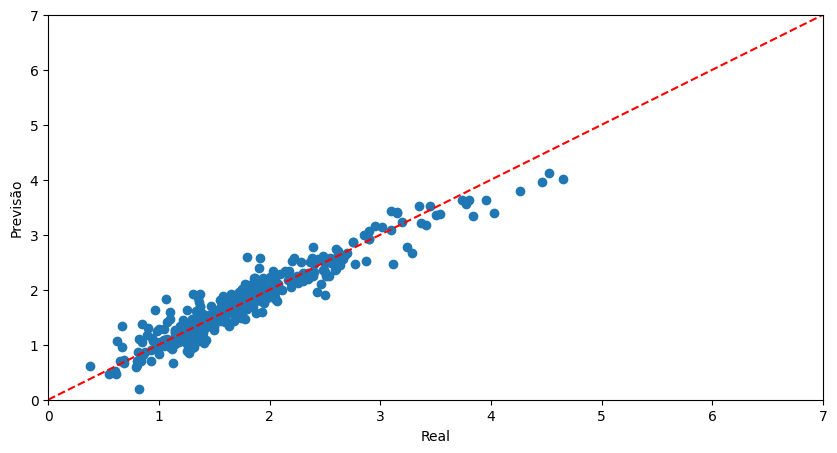

In [ ]:
import matplotlib.pyplot as plt

# %%
fig, ax = plt.subplots(ncols=1,figsize=(10,5))

ax.scatter(y_test/100000,y_pred/100000)
ax.plot([0,700000],[0,700000],'--r')
ax.set(xlim=(0, 7),ylim=(0, 7))
ax.set_xlabel('Real')
ax.set_ylabel('Previsão')

plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model_dtr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, R2Score: {r2}')

MAE: 23979.218978102188, R2Score: 0.7583573336063898


In [ ]:
pd.DataFrame({'y_test': y_test,
            'y_pred': y_pred,
             'abs_err': abs(y_pred-y_test)}).describe()

,y_test,y_pred,abs_err
count,411.000000,411.000000,411.000000
mean,174340.211679,175668.345499,23979.218978
std,68977.058436,67887.555785,23943.484452
min,37900.000000,39300.000000,0.000000
25%,129700.000000,129750.000000,8500.000000
50%,160000.000000,161500.000000,17500.000000
75%,202750.000000,201000.000000,30050.000000
max,465000.000000,424870.000000,211707.000000


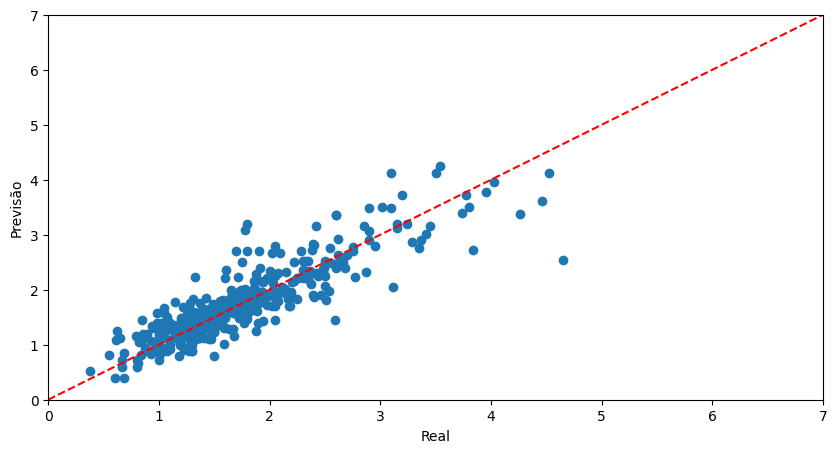

In [ ]:
fig, ax = plt.subplots(ncols=1,figsize=(10,5))

ax.scatter(y_test/100000,y_pred/100000)
ax.plot([0,700000],[0,700000],'--r')
ax.set(xlim=(0, 7),ylim=(0, 7))
ax.set_xlabel('Real')
ax.set_ylabel('Previsão')

plt.show()

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

# %%
model_rdg = Ridge(alpha=1.0)
model_rdg.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred = model_rdg.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, R2Score: {r2}')

MAE: 15178.683321279463, R2Score: 0.9118752263826719


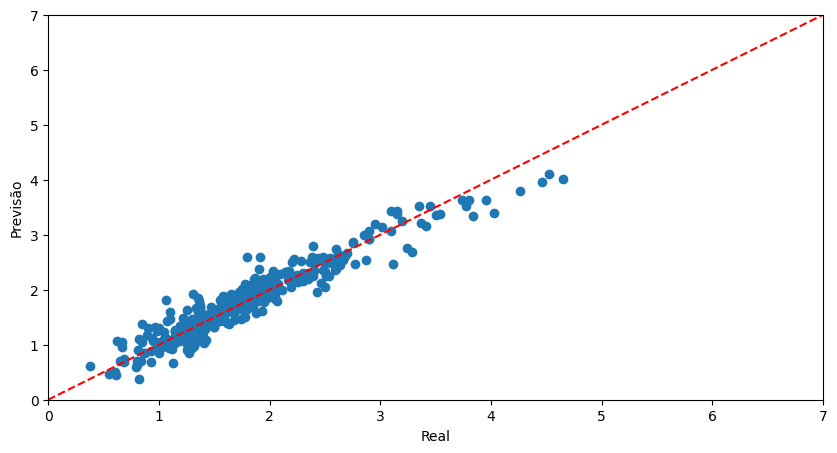

In [ ]:
fig, ax = plt.subplots(ncols=1,figsize=(10,5))

ax.scatter(y_test/100000,y_pred/100000)
ax.plot([0,700000],[0,700000],'--r')
ax.set(xlim=(0, 7),ylim=(0, 7))
ax.set_xlabel('Real')
ax.set_ylabel('Previsão')

plt.show()

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

# %%
model_ls = Lasso(alpha=0.1)
model_ls.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred = model_ls.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, R2Score: {r2}')

MAE: 15507.88034722873, R2Score: 0.9054453999228178


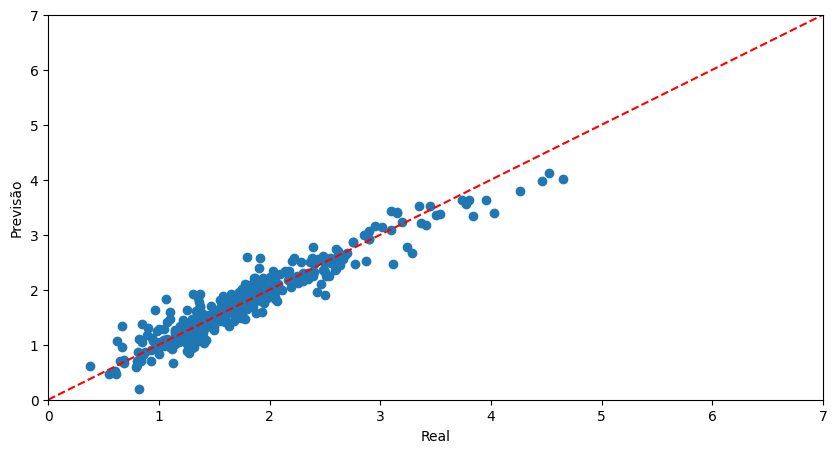

In [ ]:
fig, ax = plt.subplots(ncols=1,figsize=(10,5))

ax.scatter(y_test/100000,y_pred/100000)
ax.plot([0,700000],[0,700000],'--r')
ax.set(xlim=(0, 7),ylim=(0, 7))
ax.set_xlabel('Real')
ax.set_ylabel('Previsão')

plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# N = 5 #
neigh = KNeighborsRegressor(n_neighbors = 5,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train,y_train)

#predict value of sale price on the training set
y4_pred = neigh.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y4_pred)
r2 = r2_score(y_test, y4_pred)

print(f'MAE: {mae}, R2Score: {r2}')

MAE: 29290.26812652068, R2Score: 0.6407228785455529


# GRADIENT BOOSTING

In [ ]:
# set max depth to 4, min_samples_leaf to 15
gbr1 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 7,
                                min_samples_leaf=7, loss='huber', random_state =42)

In [ ]:
# set max depth to 7, min_samples_leaf to 10
gbr2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 9,
                                min_samples_leaf=10, loss='huber', random_state =42)

In [ ]:
#fit
model_gbr1 = gbr1.fit(X_train, y_train)
model_gbr2 = gbr2.fit(X_train, y_train)

#predict value of sale price on the training set
y_g1_pred = gbr1.predict(X_test)
y_g2_pred = gbr2.predict(X_test)


In [ ]:
mae1 = mean_absolute_error(y_test, y_g1_pred)
r1 = r2_score(y_test, y_g1_pred)

print(f'MAE: {mae1}, R2Score: {r1}')

MAE: 14819.342213159867, R2Score: 0.9004404972584759


In [ ]:
mae2 = mean_absolute_error(y_test, y_g2_pred)
r2 = r2_score(y_test, y_g2_pred)

print(f'MAE: {mae2}, R2Score: {r2}')

MAE: 14841.152469549332, R2Score: 0.8965617266053683


# **Testing**

In [ ]:
# Assuming X_df_train is your training data and X_df_test is your test data

# Get the columns used during training
train_columns = X_train.columns.to_list()

# Reindex the test data to match the training data columns
# Any missing columns in test data will be filled with NaN
X_df_test_aligned = X_df_test.reindex(columns=train_columns, fill_value=0)

# Now, make the prediction
test_predictions = model_rdg.predict(X_df_test_aligned)


In [ ]:
# Reorder the columns in X_df_test to match the order of X_test
X_df_test = X_df_test[X_test.columns]

In [ ]:
X_test

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageFinish_Unf,GarageFinish_Fin,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,YearBuilt_Cat_00-10,YearBuilt_Cat_73-99,YearBuilt_Cat_Min54,YearBuilt_Cat_54-72
456,34.0,4571,5,5,0.0,0,624,624,624,720,...,1,0,0,1,0,0,0,0,1,0
1164,73.0,16157,5,7,0.0,680,289,1360,1432,0,...,1,0,1,0,0,0,0,1,0,0
714,70.0,13517,6,8,289.0,533,192,725,725,754,...,0,0,1,0,0,0,0,1,0,0
611,79.0,10395,6,6,233.0,605,427,1032,1032,0,...,1,0,1,0,0,0,0,1,0,0
121,50.0,6060,4,5,0.0,0,732,732,772,351,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,100.0,25000,5,4,0.0,0,1632,1632,1632,0,...,1,0,1,0,0,0,0,0,0,1
1294,60.0,8172,5,7,0.0,167,697,864,864,0,...,1,0,1,0,0,0,0,0,0,1
354,60.0,8400,6,5,0.0,388,552,940,1192,403,...,1,0,1,0,0,0,0,0,1,0
680,50.0,8012,6,5,0.0,543,261,923,923,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
X_df_test

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageFinish_Unf,GarageFinish_Fin,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,YearBuilt_Cat_00-10,YearBuilt_Cat_73-99,YearBuilt_Cat_Min54,YearBuilt_Cat_54-72
0,80.0,11622,5,6,0.0,468.0,270.0,882.0,896,0,...,1,0,1,0,0,0,0,0,0,1
1,81.0,14267,6,6,108.0,923.0,406.0,1329.0,1329,0,...,1,0,1,0,0,0,0,0,0,1
2,74.0,13830,5,5,0.0,791.0,137.0,928.0,928,701,...,0,1,1,0,0,0,0,1,0,0
3,78.0,9978,6,6,20.0,602.0,324.0,926.0,926,678,...,0,1,1,0,0,0,0,1,0,0
4,43.0,5005,8,5,0.0,263.0,1017.0,1280.0,1280,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,0.0,0.0,546.0,546.0,546,546,...,1,0,1,0,0,0,0,0,0,1
1455,21.0,1894,4,5,0.0,252.0,294.0,546.0,546,546,...,1,0,1,0,0,0,0,0,0,1
1456,160.0,20000,5,7,0.0,1224.0,0.0,1224.0,1224,0,...,1,0,1,0,0,0,0,0,0,1
1457,62.0,10441,5,5,0.0,337.0,575.0,912.0,970,0,...,1,0,1,0,0,0,0,1,0,0


In [ ]:
test_predictions = model_rdg.predict(X_df_test)

In [ ]:
df_test=pd.read_csv('/content/test.csv')

In [ ]:
df_test = df_test.drop(index=42)

In [ ]:
df_test = df_test.drop(index=116)

In [ ]:
output = pd.DataFrame({
    "Id": df_test['Id'],
    "SalePrice": test_predictions
})

In [ ]:
output

,Id,SalePrice
0,1461,122900.208617
1,1462,157369.576483
2,1463,178133.210525
3,1464,195254.790549
4,1465,187447.064290
...,...,...
1454,2915,70259.059299
1455,2916,55788.172691
1456,2917,181273.992894
1457,2918,100137.863900


In [ ]:
output.to_csv('submission.csv', index=True)